# Meeting0414

## 1 Background

### 1.1 MLE: The method to fit the density model 

MLE (Maximum Likelihood Estimation)

$$\underset{\theta}{\max}\sum_{i}\log p_{\theta}(x^{(i)})$$



### 1.2 Change of Variablles

$$z=f_{\theta}(x)$$
$$p_{\theta}(x)=p(f_{\theta}(x))\left|\cfrac{\partial f_{\theta}(x)}{\partial x}\right|$$

### 1.3 Train one-dimensional Normalizing Flows (NFs)

The objective funciton:   
$$\underset{\theta}{\max}\sum_{i}\log p_{\theta}(x^{(i)})=\underset{\theta}{\max}\sum_{i}\log p_{Z}(f_{\theta}(x^{(i)}))+\log\left|\cfrac{\partial f_{\theta}}{\partial x}(x^{(i)})\right| $$

Note:  
1. $f_{\theta}$ should be **invertiblle & differentiable**, and we usually construct a special CDF as  $f_{\theta}$, see examples in 2.3
2. This objective function is not used in our project, just used here to demonstrate what a common implementation looks like.

The following is a one-dimension example. The first figure is the target distribution, the middle is the transformation function, and the last one is a chosen distribution, here is the `Uniform` distribution.

<center>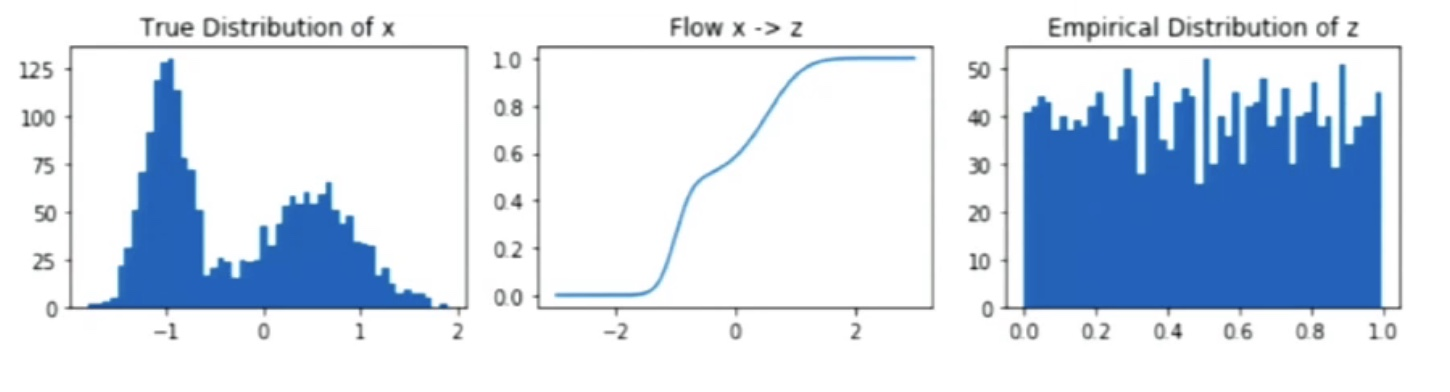 </img> </center>

When training the NFs model, we use samples from the target distribution as the input and train a model to find the transformation function using the objective function defined above.

Note:

We cannot apply this training process to our project directly, because we didn't have samples from the target distribution. The solution is to construct a new objective function described in Müller's paper and will explain it next.

### 1.4 Sampling from NFs

Step1: sample $z\sim p_{Z}(z)$   
Step2: $x=f_{\theta}^{-1}(z)$



## 2. Using NFs in Rare-Events Simulation

### 2.1 Why NFs is useful for our project? 

We can treat Normalizing Flows(NFs) as a whole, and it acts as a distribution like Gaussian, they have nice properties. We **can sample and perform density estimation easily**. What's more, NFs are more flexible than Gaussian because NFs **can learn almost any complex distribution**. Therefore, we can use NFs models to replace the Generating Network `G` of our project, and automatically achieve the functionalities of sampling and density estimation. As a result, we can omit the Density Estimation Network of our old implementation. 

To learn a given target distribution, we can use KL to derive a training objective function. After finished training, we will achieve an NFs model that is very close to the target function and can be very easily handled (easy for sampling and density estimation). Following is the derivation of the objective function.


### 2.2 Derivation of the Objective Function

Suppose we need to estimate the distance between target distribution $p$ and the distribution  $q_{\theta}$ of samples generated by NFs. We use the KL, and its gradient is:

$$\begin{align}\nabla_{\theta}D_{\mathbb{KL}}(p||q;\theta)	&=\nabla_{\theta}\int_{\Omega}p(x)\log\cfrac{p(x)}{q(x;\theta)}dx \\
	&=\nabla_{\theta}\int_{\Omega}p(x)\log p(x)dx-\nabla_{\theta}\int_{\Omega}p(x)\log q(x;\theta)dx \\
	&=-\nabla_{\theta}\int_{\Omega}p(x)\log q(x;\theta)dx \\
	&=-\nabla_{\theta}\mathbb{\mathbb{E}}_{x\sim q(X;\theta)}\cfrac{p(X)}{q(X;\theta)}\log q(X;\theta)\end{align}$$
    

It is clear that the gradident is only depend on the Cross-Entropy part.

Therefore, the objective function is:

$$\begin{align}
\underset{\theta}{\min}D_{\mathbb{KL}}(p||q;\theta)&=\underset{\theta}{\min}-\mathbb{\mathbb{E}}_{x\sim q(X;\theta)}\cfrac{p(X)}{q(X;\theta)}\log q(X;\theta) \\
&=\underset{\theta}{\min}-\mathbb{\mathbb{E}}_{x\sim q(X;\theta)}\cfrac{f(X)/c}{q(X;\theta)}\log q(X;\theta) \\
&=\underset{\theta}{\min}-\mathbb{\mathbb{E}}_{x\sim q(X;\theta)}\cfrac{f(X)}{q(X;\theta)}\log q(X;\theta)
	\end{align}$$

where $c$ is the normalizing constant, $f(X)$ is the target function, $q(X;\theta)$ can be estimated using flow model, and the samples are generated from the flow model.



### 2.2 Deal with high dimension -- solve the correlation issue

If we assume every dimension is **independent**, this can **simplify** the implementation because the Jacobian matrice is diagonal, and the determinants can be calculated easily. However, this method is **error-prone**, because it is very likely that variables correlate with each other. The solution is **to use a Neural network to learn the correlation between variables**. The popular implementations are Coupling Flows and Autoregressive Flows.


The following figure demonstrates the training of Coupling Flow, the $m(x^A)$ is trained by a neural network. **This method solved the correlation problem, but still did not affect the simplicity of the implementation.**

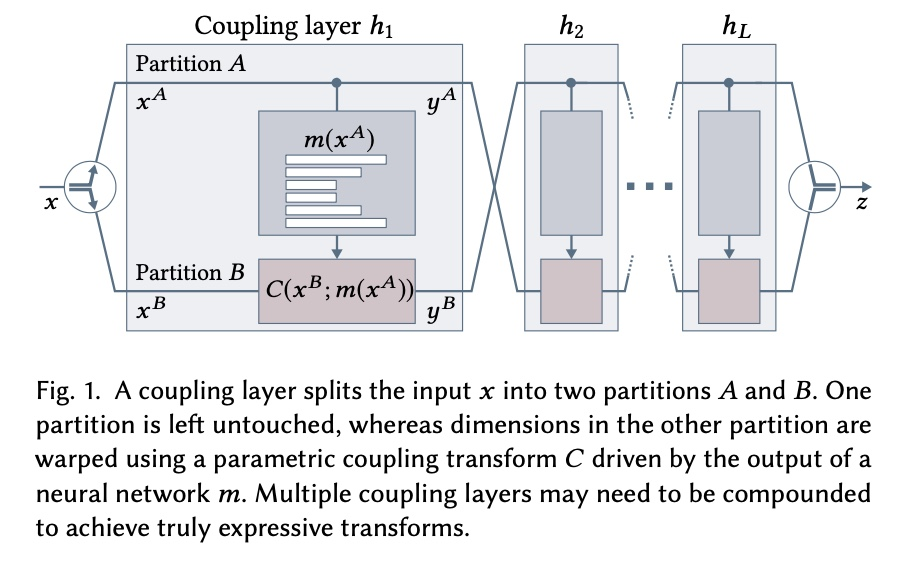 </img>

### 2.3 variety of $f_\theta$  -- more about accuracy

Improving the flexibility of the transformation function can improve the accuracy of the transformation of each dimension. Following are two implementations:

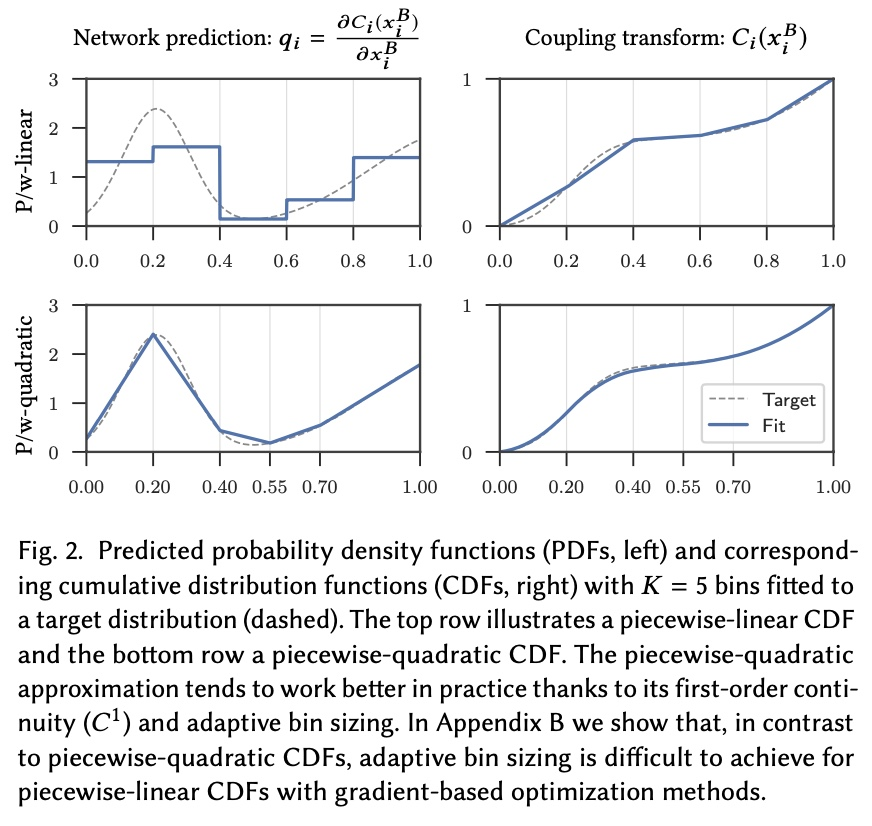 </img>

## 3. What I want to do next?

Firstly, I will fix the issue of my current implementation and applied this method to the 1d examples of our paper. 

Next, I will understand Lachlan's new solution, and try to figure out its relationship with NFs.

Finally, I will compare the two methods using the examples of papers.

## 4. About the communication in the following serveral weeks

I will update my work on GitHub and share the link with you. I think this will be more efficient and clear. 

If I have significant progress, I will notify you via email.

## 5. Reference



1. T. Müller, B. McWilliams, F. Rousselle, M. Gross, and J. Novák. “Neural importance sampling”. In: ACM Transactions on Graphics 38.5 (2019), p. 145.

2. https://drive.google.com/file/d/1j-3ErOVr8gPLEbN6J4jBeO84I7CqQdde/view